In [22]:
import os
import tensorflow as tf
os.getcwd()
# taskkill /IM "tensorboard.exe" /F

'f:\\Dropbox\\Education\\Cenfotec\\Applied ML\\Luis Rodríguez\\Clase #3 - AutoEncoders\\Código\\semana3'

In [23]:
import numpy as np
import datetime
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist # Array de imágenes en escala de grises de la forma (60000, 28, 28) para entrenamiento
                                 # y 10000 de prueba.
import matplotlib.pyplot as plt
import keras

# this is the size of our encoded representations
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
 
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [24]:
######### Optimizer #########
optimizer = keras.optimizers.Adadelta()

# configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


# Se trata de un conjunto de datos de 60.000 imágenes en escala de grises de 28x28 de los 10 dígitos,
# junto con un conjunto de prueba de 10.000 imágenes. 
# Puede encontrar más información en la página de inicio de MNIST .

(x_train, _), (x_test, _) = mnist.load_data()

# normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

autoencoder.fit(x_train, x_train,
                epochs=2000,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[tensorboard_callback])

(60000, 784)
(10000, 784)
Epoch 1/2000
235/235 [==============================] - 3s 10ms/step - loss: 0.6941 - accuracy: 0.0022 - val_loss: 0.6941 - val_accuracy: 0.0017
Epoch 2/2000
235/235 [==============================] - 1s 4ms/step - loss: 0.6939 - accuracy: 0.0020 - val_loss: 0.6939 - val_accuracy: 0.0017
Epoch 3/2000
235/235 [==============================] - 1s 4ms/step - loss: 0.6938 - accuracy: 0.0022 - val_loss: 0.6937 - val_accuracy: 0.0017
Epoch 4/2000
235/235 [==============================] - 1s 4ms/step - loss: 0.6936 - accuracy: 0.0020 - val_loss: 0.6935 - val_accuracy: 0.0017
Epoch 5/2000
235/235 [==============================] - 1s 4ms/step - loss: 0.6934 - accuracy: 0.0022 - val_loss: 0.6933 - val_accuracy: 0.0017
Epoch 6/2000
235/235 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.0018 - val_loss: 0.6931 - val_accuracy: 0.0017
Epoch 7/2000
235/235 [==============================] - 1s 4ms/step - loss: 0.6930 - accuracy: 0.0018 - val_l

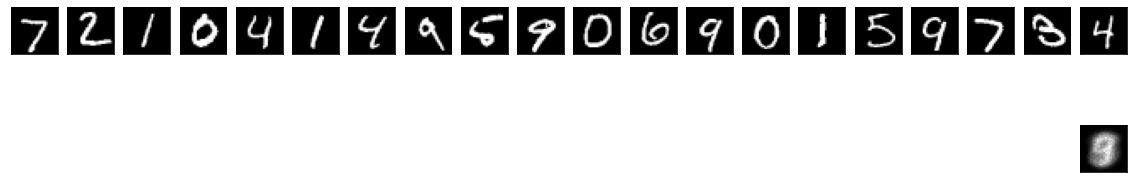

In [25]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
n = 20 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
# display reconstruction
ax = plt.subplot(2, n, i + 1 + n)
plt.imshow(decoded_imgs[i].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()